# K-Means Clustering Algorithm in Julia
#### Isabel De La Cruz

K-means clustering is an unsupervised machine learning technique. The algorithm clusters data points based on similarity between data points. 

It does this by using the method of distance measure: **Euclidean Distance**. 
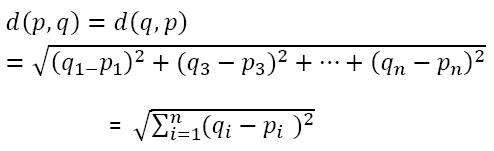


K-means uses the concept of **centroid** to create the K-clusters. 
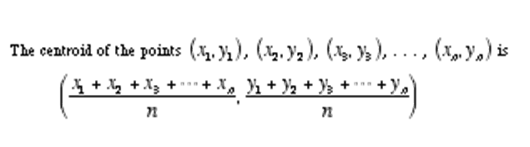

We will now begin to build the algortithm.

In [1]:
#import packages
using Statistics
using Plots

### Generate Artificial Data

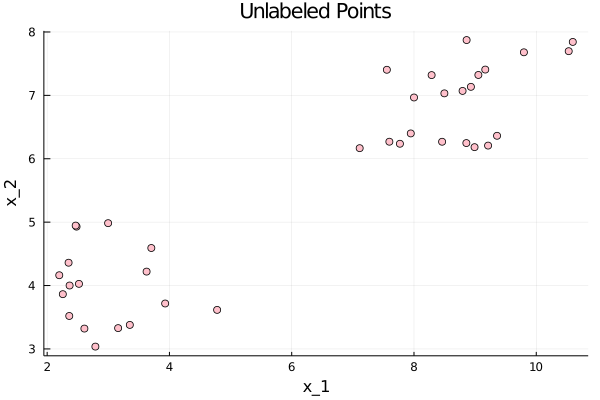

In [2]:
# Generate the artificial data
function CircleShape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    return h.+r*sin.(θ), k.+r*cos.(θ)
end

# Assume center of cluster 1 is (3, 4) with radius 1.8
cluster1 = [(3 + (-1)^rand(1:2)*rand(1:2)*rand(), 4 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:17]

# Assume center of cluster 2 is (9, 7) with radius 2.2
cluster2 = [(9 + (-1)^rand(1:2)*rand(1:2)*rand(), 7 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:21]

# Make the full data set of unlabeled points
data = copy(cluster1)
for x in cluster2
    push!(data, x)
end

# Plot the data
plot(legend = false, xlabel = "x_1", ylabel = "x_2", title = "Unlabeled Points")
scatter!(data, color = "pink")

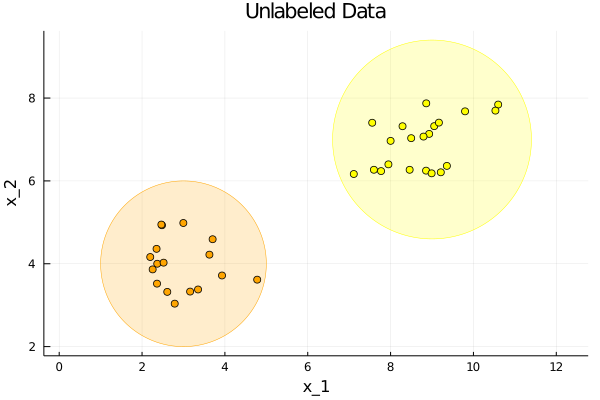

In [3]:
# Plot it
plot(legend = false, xlabel = "x_1", ylabel = "x_2", title = "Unlabeled Data")

plot!(CircleShape(3, 4, 2.0), seriestype = [:shape, ], lw = 0.5,
c = "orange", linecolor = "orange", legend = false, fillalpha = 0.2, 
    aspect_ratio = 1)
plot!(CircleShape(9, 7, 2.4), seriestype = [:shape, ], lw = 0.5,
c = "yellow", linecolor = "yellow", legend = false, fillalpha = 0.2,
aspect_ratio = 1)

scatter!(cluster1, color = "orange", legend = false)
scatter!(cluster2, color = "yellow", legend = false)

Now, we will find the distance between 2 points using the Euclidean distance function.

In [4]:
# Define Euclidean distance

function euclidean_distance(p1, p2)
    return sqrt(sum([(p1[i] - p2[i])^2 for i = 1:length(p1)]))
end

euclidean_distance (generic function with 1 method)

In [5]:
# Define the K-Means Distance
function kMeans_distances(X, centroids, k)
    distances = Dict()
    for p in X
        temp_Dict = Dict()
        for i = 1:k
            temp_Dict[i] = euclidean_distance(p, centroids[i])
        end
        distances[p] = temp_Dict
    end
    return distances
end

kMeans_distances (generic function with 1 method)

In [6]:
# Define the K-Means Clustering
function kMeans_Clustering(X, centroids, k)
    distances = kMeans_distances(X, centroids, k)
    clusters = Dict()
    for p in X
        clusters[p] = 1
        min_distance = distances[p][1]
        for i = 2:k
            if distances[p][i] < min_distance
                clusters[p] = i
                min_distance = distances[p][i]
            end
        end
    end
    return clusters
end

kMeans_Clustering (generic function with 1 method)

Next, we will compute the new centers.

In [16]:
# Centroid Update Function
function kMeans_update_Centroids(X, centroids, k)
    clusters = kMeans_Clustering(X, centroids, k)
    newCentroids = []
    for j = 1:k
        x = mean([p[1]::Float64 for p in keys(clusters) if clusters[p] == j])
        y = mean([p[2]::Float64 for p in keys(clusters) if clusters[p] == j])
        point = (x, y)
        push!(newCentroids, point)
        j += 1
    end
    return newCentroids
end

kMeans_update_Centroids (generic function with 1 method)

### Testing the functions

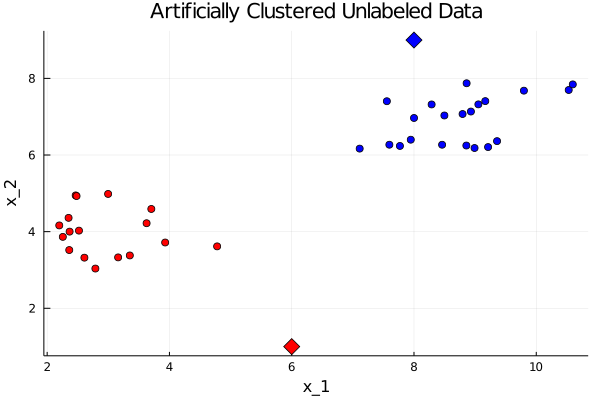

In [17]:
#Test functions (k = 2)
initialCentroids = [(rand(1.0:10.0), rand(1.0:10.0)), (rand(1.0:10.0), rand(1.0:10.0))]
clusters = kMeans_Clustering(data, initialCentroids, 2)

plot(legend = false, xlabel = "x_1", ylabel = "x_2", #, xlim = (0, 12), ylim = (0, 10),
     title = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "red", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([initialCentroids[1]], color = "red", shape= :diamond, markersize=8)
scatter!([initialCentroids[2]], color = "blue", shape= :diamond, markersize=8)

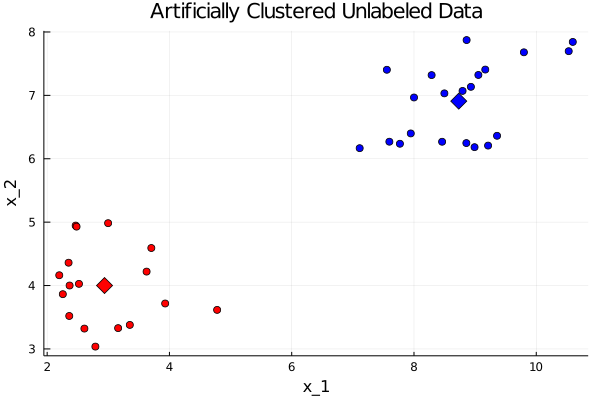

In [18]:
# Test update function
centroidsTest = kMeans_update_Centroids(data, initialCentroids, 2)
clusters2 = kMeans_Clustering(data, centroidsTest, 2)

plot(legend = false, xlabel = "x_1", ylabel = "x_2",
     title = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters2) if clusters2[x] == 1], color = "red", legend = false)
scatter!([x for x in keys(clusters2) if clusters2[x] == 2], color = "blue", legend = false)


scatter!([centroidsTest[1]], color = "red", shape= :diamond, markersize=8)
scatter!([centroidsTest[2]], color = "blue", shape= :diamond, markersize=8)

In [19]:
# K-Means Algorithm
function kMeans_algorithm(X, k, ϵ; return_centroids = false)
    
    centroids = []
    for _ = 1:k
        i = rand(1:length(X))
        j = rand(1:length(X))/length(X)
        push!(centroids, (X[i][1] + j, X[i][2] - j))
    end
    
    new_centroids = kMeans_update_Centroids(X, centroids, k)
    h = 1
    while maximum([euclidean_distance(centroids[i], new_centroids[i]) for i = 1:k]) > ϵ && h < 10000000
        centroids, new_centroids = new_centroids, kMeans_update_Centroids(X, new_centroids, k)
        h+=1
    end
    
    if return_centroids == false
        new_centroids = kMeans_Clustering(X, new_centroids, k)
        return new_centroids
    else
        return new_centroids
    end
end

kMeans_algorithm (generic function with 1 method)

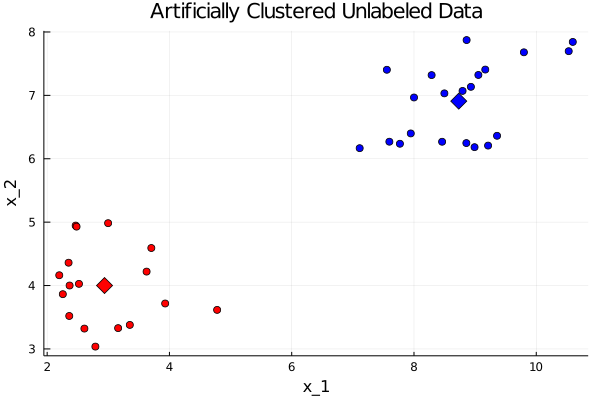

In [20]:
#Test the function
centroidsTesting = kMeans_algorithm(data, 2, 0.0001, return_centroids = true)

plot(legend = false, xlabel = "x_1", ylabel = "x_2",
    title = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "red", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroidsTesting[1]], color = "red", shape= :diamond, markersize=8)
scatter!([centroidsTesting[2]], color = "blue", shape= :diamond, markersize=8)